<a href="https://colab.research.google.com/github/ssyifab/main/blob/main/Salsabila_Syifa_Binsanno_Analisis_Home_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Memasukkan **library** yang ingin dipakai

In [1]:
import numpy as np
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt
import warnings 
import scipy.stats as stats
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

Memasukkan **data** yang ingin diteliti

In [3]:
data=pd.read_csv('/analisis_data/application_test.csv')

In [ ]:
data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


 **DATA PREPOCESSING**

In [ ]:
data['AMT_CREDIT'].describe()

count    4.874400e+04
mean     5.167404e+05
std      3.653970e+05
min      4.500000e+04
25%      2.606400e+05
50%      4.500000e+05
75%      6.750000e+05
max      2.245500e+06
Name: AMT_CREDIT, dtype: float64

In [ ]:
data['AMT_CREDIT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48744 entries, 0 to 48743
Series name: AMT_CREDIT
Non-Null Count  Dtype  
--------------  -----  
48744 non-null  float64
dtypes: float64(1)
memory usage: 380.9 KB


In [ ]:
data['AMT_CREDIT'].dtype

dtype('float64')

In [ ]:
data['AMT_CREDIT'].isnull().sum()

0

In [ ]:
data1=data['AMT_CREDIT']

In [ ]:
data1

0         568800.0
1         222768.0
2         663264.0
3        1575000.0
4         625500.0
           ...    
48739     412560.0
48740     622413.0
48741     315000.0
48742     450000.0
48743     312768.0
Name: AMT_CREDIT, Length: 48744, dtype: float64

Mengambil **Digit Pertama** dari data

In [ ]:
data1['AMT_Leading_First']=data1.apply(lambda x:str(x)[0])

In [ ]:
(data1['AMT_Leading_First'].value_counts()/data1['AMT_Leading_First'].value_counts().sum())

1    0.198301
2    0.196681
4    0.136591
5    0.123215
3    0.115953
6    0.083456
7    0.061484
9    0.049750
8    0.034568
Name: AMT_CREDIT, dtype: float64

In [5]:
observed_data = [0.200987,0.195014,0.116333,0.140743,0.120748,0.083615,0.059725,0.033238,0.049078]
frekuensi=[1,2,3,4,5,6,7,8,9]

*Grafik dari Data yang akan diteliti*

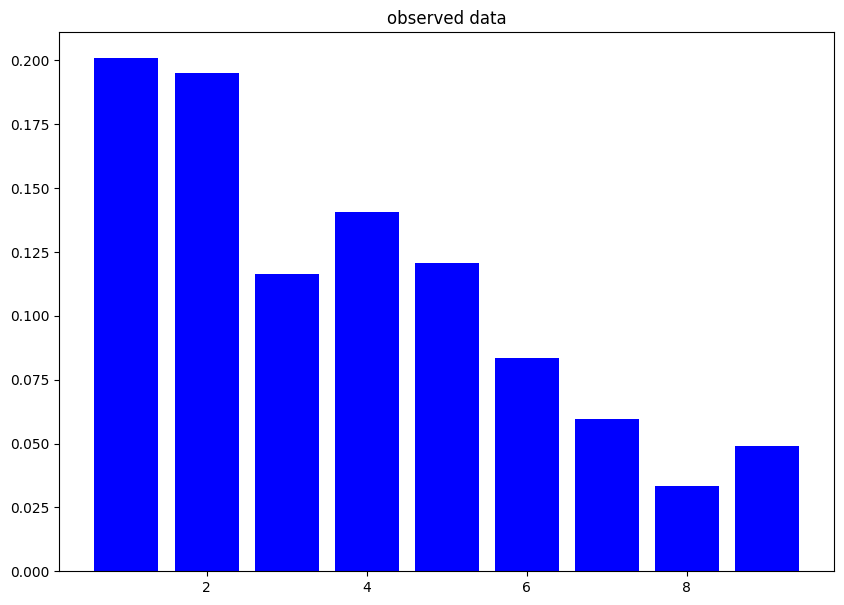

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(frekuensi, observed_data, color='blue')

plt.title('observed data', size=12)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

Menghitung Nilai **Benford**

In [10]:
def prob_digit(d):
    d = int(d)
    prob_d = np.log10(1 + 1/d)
    return prob_d

In [11]:
benford1=prob_digit(1)
benford2=prob_digit(2)
benford3=prob_digit(3)
benford4=prob_digit(4)
benford5=prob_digit(5)
benford6=prob_digit(6)
benford7=prob_digit(7)
benford8=prob_digit(8)
benford9=prob_digit(9)

In [12]:
benford1

0.3010299956639812

In [13]:
benford2

0.17609125905568124

In [14]:
benford3

0.12493873660829992

In [15]:
benford4

0.09691001300805642

In [16]:
benford5

0.07918124604762482

In [17]:
benford6

0.06694678963061322

In [18]:
benford7

0.05799194697768673

In [19]:
benford8

0.05115252244738129

In [21]:
benford9

0.04575749056067514

In [20]:
expected_data = [benford1,benford2,benford3,benford4,benford5,benford6,benford7,benford8,benford9]

Gambar **Grafik** dari Benford Law

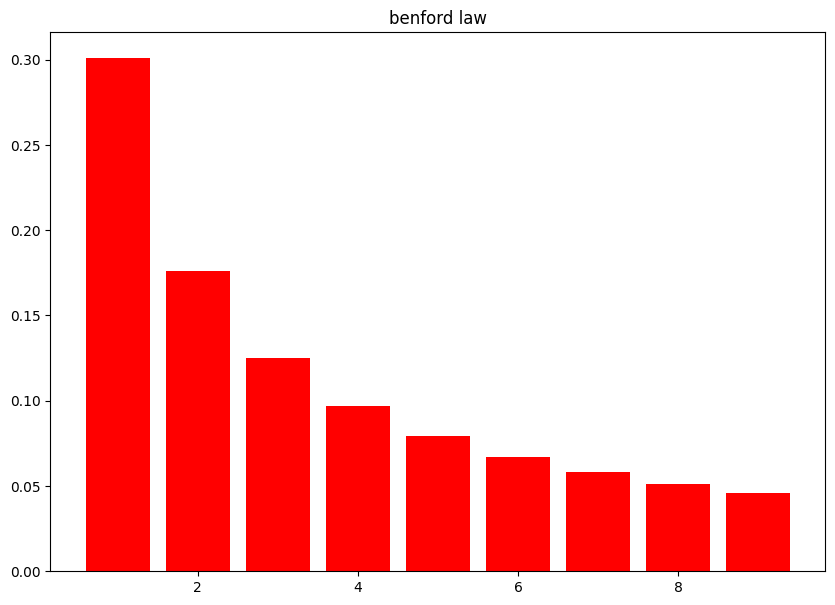

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(frekuensi, expected_data, color='red')

plt.title('benford law', size=12)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

Penelitian menggunakan **Chi Square**

In [45]:
diamati=np.array([observed_data])
diharapkan=np.array([expected_data])

In [59]:
chi_square_stat=((((diamati)-(diharapkan))**2)/(diharapkan)).sum()

In [60]:
chi_square_stat

0.08823747228414242

In [74]:
from scipy.stats.distributions import chi2
nilai_kritis =chi2.ppf(q=0.95,df=8)
nilai_kritis

15.50731305586545

In [75]:
p_value = 1 - chi2.cdf(x=chi_square_stat,df=8)
p_value

0.9999998476073959

pada penelitian ini didapat nilai observed data yaitu sebesar *0.08823747228414242* teks tebal yang dimana nilai tersebut kurang dari nilai chi-square yaitu *15.50731305586545* sebesar sehingga data dinyatakan tidak terdapat kecurangan yang dapat diartikan **kepercayaan Home Credit di masyarakat akan meningkat**.

**Gambar Perbandingan data yang diteliti dengan Benfords law**

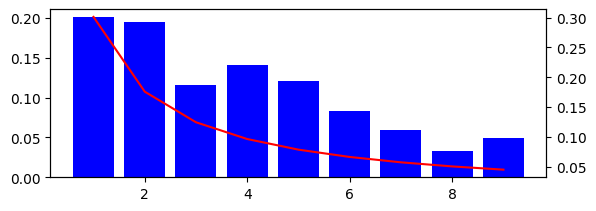

In [ ]:
plt.subplot(2, 1, 1)
plt.bar(frekuensi, observed_data, color='blue')
plt.xticks(size=10)
plt.yticks(size=10)

plt.twinx()
plt.plot(frekuensi, expected_data, color='red')
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

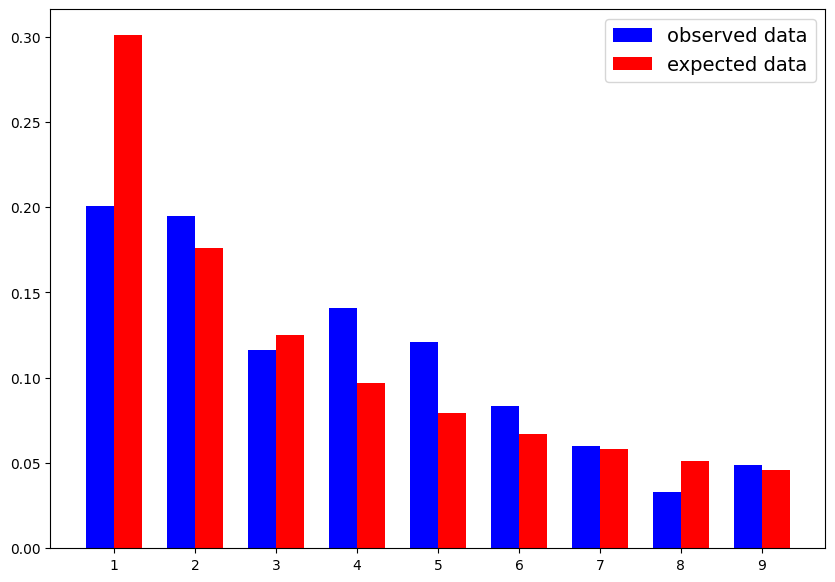

In [ ]:
x = np.arange(len(frekuensi))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7))

obs = ax.bar(x - width/2, observed_data, width, label='observed data', color='blue')
benford = ax.bar(x + width/2, expected_data, width, label='expected data', color='red')

ax.set_xticks(x)
ax.set_xticklabels(frekuensi, size=10)
ax.legend(fontsize=14)

plt.show()